# Data Understanding

## 1. Overview

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading Data
df = pd.read_csv('../Data/first_data.csv')
df.sample(5)

,league,team,season,revenue,spent,competition,position,wins,ties,losses,league_spent,relative,net,goals_for,goals_against,5_season_agg,5_season_net,5_season_league_agg,5_season_relative,first_tier
3726,Scotland,Livingston FC,96,0.00,0.00,Not First,≤10,NaN,NaN,NaN,0.00,NaN,0.00,NaN,NaN,0.000,0.339,91.81,0.000000,0
638,Italy,Inter Milan,15,23.60,16.95,First Tier,8,14.0,13.0,11.0,468.15,0.036206,6.65,59.0,48.0,233.130,-12.750,2746.48,0.084883,1
3757,Scotland,St. Mirren FC,95,0.00,0.00,Not First,≤10,NaN,NaN,NaN,0.00,NaN,0.00,NaN,NaN,0.248,2.177,120.17,0.002064,0
1894,Turkey,Trabzonspor,3,1.34,2.62,First Tier,7,13.0,12.0,9.0,40.95,0.063980,-1.28,44.0,33.0,23.660,-2.490,219.19,0.107943,1
1286,France,Olympique Marseille,11,22.60,41.50,First Tier,2,18.0,14.0,6.0,153.92,0.269621,-18.90,62.0,39.0,161.350,-38.520,1141.97,0.141291,1


In [3]:
# Inspecting Data
def print_dataframe_summary(df: pd.DataFrame):
    # Calculate the number of rows and columns
    n_rows = df.shape[0]
    n_columns = df.shape[1]
    
    # Calculate the total size (number of elements)
    total_elements = df.size
    
    # Calculate the total number of NaN values
    total_nan = df.isna().sum().sum()
    
    # Calculate the percentage of NaN values
    nan_percentage_total = (total_nan / total_elements) * 100
    
    # Identify numeric and categorical columns
    num_columns = df.select_dtypes(include=['number']).columns
    cat_columns = df.select_dtypes(include=['object', 'category']).columns
    
    # Calculate NaN values and percentages for numeric and categorical columns
    num_nan = df[num_columns].isna().sum().sum()
    num_nan_percentage = (num_nan / df[num_columns].size) * 100 if len(num_columns) > 0 else 0
    
    cat_nan = df[cat_columns].isna().sum().sum()
    cat_nan_percentage = (cat_nan / df[cat_columns].size) * 100 if len(cat_columns) > 0 else 0
    
    # Calculate the number of duplicate rows
    n_duplicates = df.duplicated().sum()
    
    # Display the information
    print("===== DataFrame Summary =====\n")
    print(f"Number of rows: {n_rows}")
    print(f"Number of columns: {n_columns}")
    print(f"Total size (number of elements): {total_elements}")
    print(f"Total number of NaN values: {total_nan} ({nan_percentage_total:.2f} %)")
    print(f"Total numeric columns: {len(num_columns)} ({num_nan_percentage:.2f} % NaN)")
    print(f"Total categorical columns: {len(cat_columns)} ({cat_nan_percentage:.2f} % NaN)")
    print(f"Number of duplicate rows: {n_duplicates}\n")
    print("=============================")

print_dataframe_summary(df)

===== DataFrame Summary =====

Number of rows: 4342
Number of columns: 20
Total size (number of elements): 86840
Total number of NaN values: 2828 (3.26 %)
Total numeric columns: 16 (4.07 % NaN)
Total categorical columns: 4 (0.00 % NaN)
Number of duplicate rows: 0



### c. Summary

+ **Shape :** **(4342 , 20)**
  
    + **Number of Rows (Entries):** **4,342** entries are present in the dataset.
    + **Number of Columns:** The dataset contains **20** columns, which include a mix of **numeric** and **categorical** data.
    + **Number of duplicate rows:** **0** the dataset doesn't have any duplicate rows.

+ **Size and Missing Values:**
  
    + **Size :**
      
        + The dataset contains **86,840** individual data points (cells) in the dataset.

    + **Missing Values :**
      
        + The dataset contains **2,828** missing values, which is about **3.26 %** of the total data.
        + The missing data is mostly within the **numeric** columns (**4.07 %**), while **categorical** columns have **no missing values** (**0 %**).
  
***NOTE :***

+ A **3.26 %** missing data rate is relatively low but should still be addressed, especially if the missing data is concentrated in important columns.

## 2. Datatypes 

###  a. Datatypes Column Information

In [4]:
def print_column_types_and_names(df: pd.DataFrame):
    # Title for the output
    print("===== DataFrame Column Information =====\n")
    
    # Identification of float columns
    float_cols = df.select_dtypes(include=['float64']).columns
    n_float_columns = len(float_cols)
    
    # Identification of integer columns
    int_cols = df.select_dtypes(include=['int64']).columns
    n_int_columns = len(int_cols)
    
    # Total numeric columns (float + int)
    total_numeric_columns = n_float_columns + n_int_columns
    
    # Display the total number of numeric columns
    print(f"=== Total numeric columns: {total_numeric_columns} ===\n")
    
    # Detail by column type for float columns
    if n_float_columns > 0:
        print(f"{n_float_columns} column(s) of type 'float64':\n")
        for col in float_cols:
            print(f"  - {col}")
        print()  # Blank line to separate types
    
    # Detail by column type for integer columns
    if n_int_columns > 0:
        print(f"{n_int_columns} column(s) of type 'int64':\n")
        for col in int_cols:
            print(f"  - {col}")
        print()  # Blank line to separate types
    
    # Identification of categorical columns
    cat_cols = df.select_dtypes(include=['object']).columns
    n_categorical_columns = len(cat_cols)
    
    # Display the total number of categorical columns
    print(f"=== Total categorical columns: {n_categorical_columns} ===\n")
    
    # Detail by column type for categorical columns
    if n_categorical_columns > 0:
        print(f"{n_categorical_columns} column(s) of type 'object':\n")
        for col in cat_cols:
            print(f"  - {col}")
        print()  # Blank line to separate types
    
    print("=========================================")

print_column_types_and_names(df)

===== DataFrame Column Information =====

=== Total numeric columns: 16 ===

14 column(s) of type 'float64':

  - revenue
  - spent
  - wins
  - ties
  - losses
  - league_spent
  - relative
  - net
  - goals_for
  - goals_against
  - 5_season_agg
  - 5_season_net
  - 5_season_league_agg
  - 5_season_relative

2 column(s) of type 'int64':

  - season
  - first_tier

=== Total categorical columns: 4 ===

4 column(s) of type 'object':

  - league
  - team
  - competition
  - position



### b. Datatypes Column Visualizations

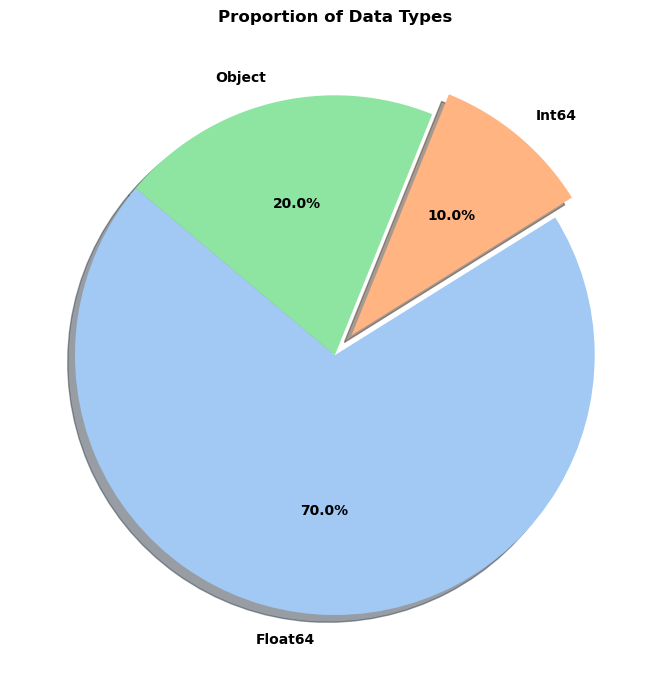

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define data for the first pie chart: Proportion of different data types
data_types = [
    df.select_dtypes(include=['float64']).size, 
    df.select_dtypes(include=['int64']).size, 
    df.select_dtypes(include=['object']).size
]
data_types_labels = ['Float64', 'Int64', 'Object']

# Use a beautiful palette from seaborn
colors_chart1 = sns.color_palette("pastel", len(data_types))

# Plot 1: Proportion of Data Types with shadow
fig, ax = plt.subplots(figsize=(7, 7))

ax.pie(
    data_types, 
    labels=data_types_labels, 
    autopct=lambda p: f'{p:.1f}%', 
    colors=colors_chart1, 
    startangle=140, 
    explode=[0, 0.1, 0],
    textprops={'fontweight': 'bold'},
    shadow=True  # Add shadow to the pie chart
)
ax.set_title('Proportion of Data Types', fontweight='bold')

# Show the pie chart
plt.tight_layout()
plt.show()

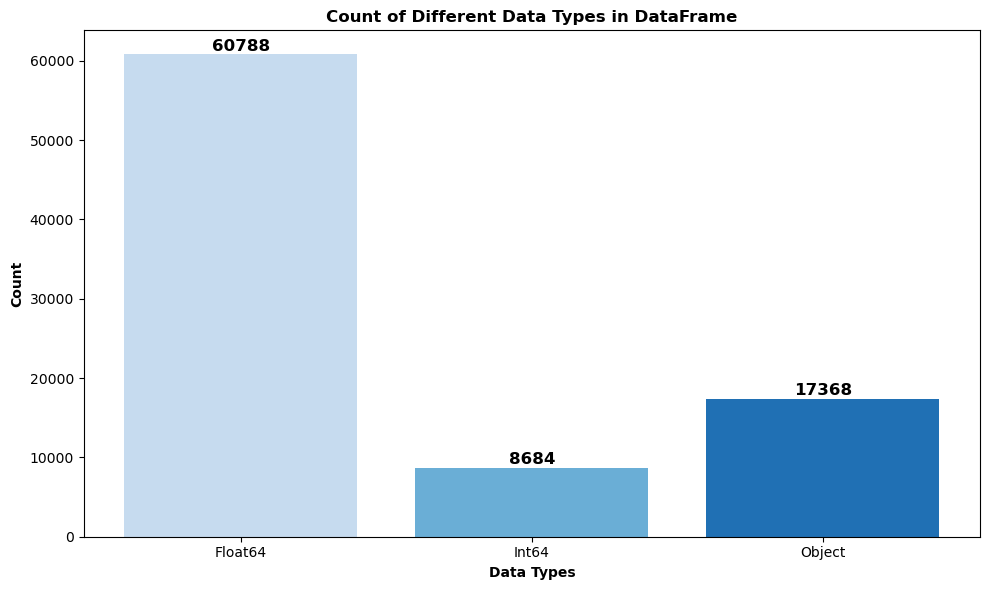

In [6]:
# Define data for the bar chart: Count of different data types
data_types_counts = [
    df.select_dtypes(include=['float64']).size, 
    df.select_dtypes(include=['int64']).size, 
    df.select_dtypes(include=['object']).size
]
data_types_labels = ['Float64', 'Int64', 'Object']

# Use a vibrant color palette from Seaborn
palette = sns.color_palette("Blues", len(data_types_labels))

# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(data_types_labels, data_types_counts, color=palette)

# Add numbers on top of each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 100, f'{yval}', 
            ha='center', va='bottom', fontweight='bold', fontsize=12)

# Set labels and title
ax.set_xlabel('Data Types', fontweight='bold')
ax.set_ylabel('Count', fontweight='bold')
ax.set_title('Count of Different Data Types in DataFrame', fontweight='bold')

# Apply tight layout for better spacing
plt.tight_layout()

# Show the bar chart
plt.show()

### c. Summary

+ **Numeric Columns :** The Dataset contains **16** columns that have numeric data types (**float64** or **int64**).
  
    + Columns of Type **`float64`** : **14** columns listed under `float64` (**70 %**) contain continuous data, such as financial amounts or performance metrics.

        + **`revenue`:** The amount of money earned by a team from player sales that season in millions of euros.
        + **`spent`:** The amount of money spent by a team on player acquisition that season in millions of euros.
        + **`wins`**, **`ties`**, **`losses`:** Represent the number of wins, ties, and losses, respectively.
        + **`league_spent`:** The amount of money spent by all teams in the First Tier for player acquisitions that season in millions of euros.
        + **`relative`:** Spent divided by League Spent. The relative money spent is perhaps the most important feature because it allows us to compare different leagues and different seasons with vastly different budgets from eachother.
        + **`net`:** The money earned minus the money spent by a team on player acquisition that season in millions of euros.
        + **`goals_for`**, **`goals_against`:** The goals scored for and the goals scored against a team that season.
        + **`5_season_agg`:** The amount of money spent by a team on player acquisition that season and four seasons prior combined in millions of euros.
        + **`5_season_net`:** The money earned minus the money spent by a team on player acquisition that season and four seasons prior combined in millions of euros.
        + **`5_season_league_agg`:** The amount of money spent by all teams in the 'First Tier' for player acquisitions that season and four seasons prior combined in millions of euros.
        + **`5_season_relative`:** 5 season aggregate divided by the 5 seasons league aggregate. Accomplishes the same things as 'relative' but comparing the past 5 seasons instead. This feature is less reliable however because there is no guarantee that the team was in the 'First Tier' over those 5 years and '5 season league aggregate' is a measure of the 'First Tier' spending.
        + 
    + Columns of Type **`int64`** : **2** columns are stored as integers (**10 %**). They typically represent discrete or count data.
      
        + **`season`:** Represents the year or season ended.
        + **`first_tier`:** A simple boolean feature to specify the team played in the highest division of that country's professional soccer leagues. 

+ **Categorical Columns:** The **4** categorical columns (**20 %**) pertain to **qualitative** information.
  
    + Columns of Type **`object`**:
  
        + **`league`:** The league in which the team plays.
        + **`competition` :** The division in which the team played that season. 
        + **`team` :** The team who recorded these stats for this season.
        + **`position` :** The final league ranking of a team for that season. Unique values range from '1' to '≤10' and anything below the 'First Tier' is automatically lumped in with the '≤10' category.
  
***NOTES :*** 

+ The dataset is primarily **numerical** (**80 %**) of the columns, which suggests that **quantitative analysis** will be key.
+ The **categorical** columns (**20 %**) will be useful for grouping data and performing **comparative analysis** across different teams or leagues.
+ The **variety** of data types (`float64`, `int64`, and `object`) reflects the dataset's complexity, encompassing financial, performance, and classification data, all of which are essential for a comprehensive analysis of football team performance.

## 3. Missing Values

###  a. Missing Values Column Information

In [7]:
def display_detailed_nan_info(df: pd.DataFrame):
    # Identify columns by type
    float_cols = df.select_dtypes(include=['float64']).columns
    int_cols = df.select_dtypes(include=['int64']).columns
    cat_cols = df.select_dtypes(include=['object']).columns
    
    # Calculate NaN values for each column
    float_nan = df[float_cols].isna().sum()
    int_nan = df[int_cols].isna().sum()
    cat_nan = df[cat_cols].isna().sum()
    
    # Calculate total NaN values
    total_float_nan = float_nan.sum()
    total_int_nan = int_nan.sum()
    total_cat_nan = cat_nan.sum()
    
    # Calculate total NaN values across all columns
    total_nan = total_float_nan + total_int_nan + total_cat_nan
    total_columns = len(float_cols) + len(int_cols) + len(cat_cols)
    
    # Calculate percentages of NaN values relative to all data
    total_nan_percentage = (total_nan / (df.shape[0] * total_columns)) * 100 if total_nan > 0 else 0
    total_numeric_nan_percentage = (total_float_nan + total_int_nan) / total_nan * 100 if total_nan > 0 else 0
    total_cat_nan_percentage = total_cat_nan / total_nan * 100 if total_nan > 0 else 0

    # Display information
    print("======== NaN Values and Percentages by Column ========\n")
    
    # Total NaNs in numeric columns
    total_numeric_nan = total_float_nan + total_int_nan
    print(f"== Total NANs in numeric columns: {total_numeric_nan} ({total_numeric_nan_percentage:.2f}%) ==\n")
    
    # Float64 columns
    if len(float_cols) > 0:
        print(f"column(s) of type 'float64': {total_float_nan} ({total_numeric_nan_percentage:.2f}%)\n")
        for col in float_cols:
            col_nan_percentage = (float_nan[col] / df.shape[0]) * 100
            print(f"  - {col}: {float_nan[col]} ({col_nan_percentage:.2f}%)")
        print()  # Blank line to separate types
    
    # Int64 columns
    if len(int_cols) > 0:
        int_nan_percentage = (total_int_nan / df.shape[0]) * 100
        print(f"column(s) of type 'int64': {total_int_nan} ({int_nan_percentage:.2f}%)\n")
        for col in int_cols:
            col_nan_percentage = (int_nan[col] / df.shape[0]) * 100
            print(f"  - {col}: {int_nan[col]} ({col_nan_percentage:.2f}%)")
        print()  # Blank line to separate types
    
    # Total NANs in categorical columns
    print(f"== Total NANs in categorical columns: {total_cat_nan} ({total_cat_nan_percentage:.2f}%) ==\n")
    
    # Object columns
    if len(cat_cols) > 0:
        for col in cat_cols:
            col_nan_percentage = (cat_nan[col] / df.shape[0]) * 100
            print(f"  - {col}: {cat_nan[col]} ({col_nan_percentage:.2f}%)")
        print()  # Blank line to separate types
    
    print("=====================================================")

display_detailed_nan_info(df)

======== NaN Values and Percentages by Column ========

== Total NANs in numeric columns: 2828 (100.00%) ==

column(s) of type 'float64': 2828 (100.00%)

  - revenue: 0 (0.00%)
  - spent: 0 (0.00%)
  - wins: 552 (12.71%)
  - ties: 552 (12.71%)
  - losses: 552 (12.71%)
  - league_spent: 0 (0.00%)
  - relative: 65 (1.50%)
  - net: 0 (0.00%)
  - goals_for: 552 (12.71%)
  - goals_against: 552 (12.71%)
  - 5_season_agg: 0 (0.00%)
  - 5_season_net: 0 (0.00%)
  - 5_season_league_agg: 0 (0.00%)
  - 5_season_relative: 3 (0.07%)

column(s) of type 'int64': 0 (0.00%)

  - season: 0 (0.00%)
  - first_tier: 0 (0.00%)

== Total NANs in categorical columns: 0 (0.00%) ==

  - league: 0 (0.00%)
  - team: 0 (0.00%)
  - competition: 0 (0.00%)
  - position: 0 (0.00%)



### b. Missing Values Column Visualizations

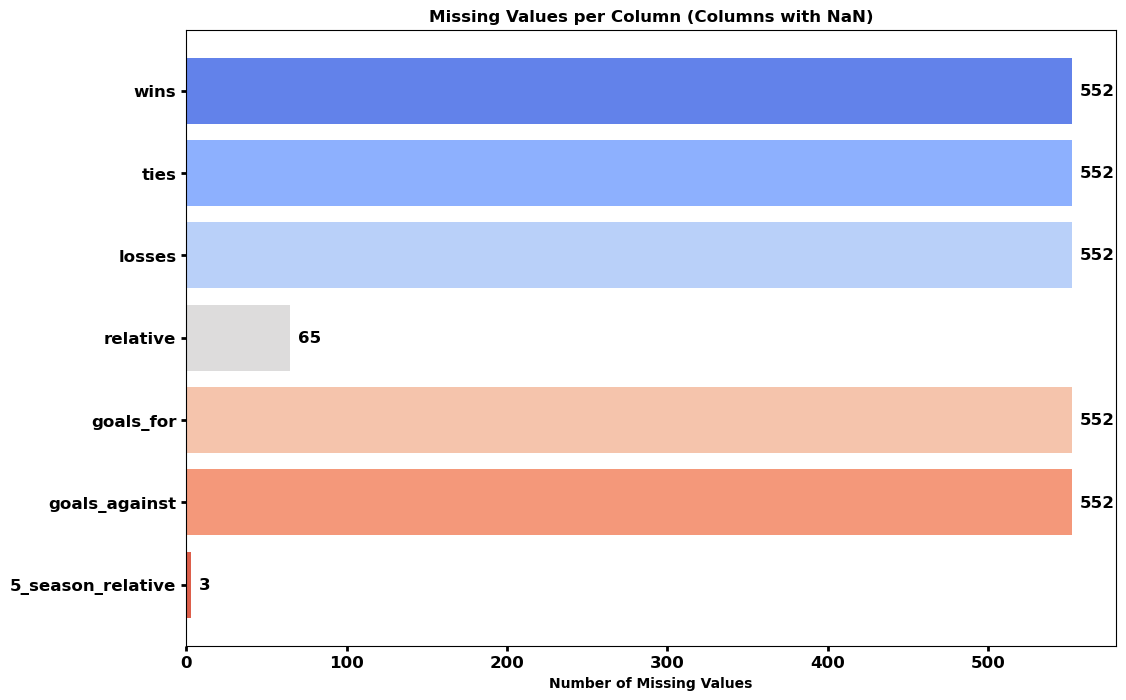

In [8]:
# Filter columns with NaN values
missing_values = df.isna().sum()
columns_with_nan = missing_values[missing_values > 0]

# Use a palette from seaborn for better aesthetics
palette_nan = sns.color_palette("coolwarm", len(columns_with_nan))

# Plot focusing on columns with NaN values
fig, ax = plt.subplots(figsize=(12, 8))

# Bar chart for columns with NaN values
bars = ax.barh(columns_with_nan.index, columns_with_nan.values, color=palette_nan)
ax.set_xlabel('Number of Missing Values', fontweight='bold')
ax.set_title('Missing Values per Column (Columns with NaN)', fontweight='bold')
ax.invert_yaxis()  # Invert y-axis to have the highest values on top

# Add numbers on top of each bar
for bar in bars:
    width = bar.get_width()
    ax.text(width + 5, bar.get_y() + bar.get_height()/2, f'{int(width)}', 
            va='center', fontweight='bold', fontsize=12, color='black')

# Make the tick labels bold
ax.tick_params(axis='both', which='major', labelsize=12, width=2)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight('bold')

# Show the bar chart plot
plt.show()

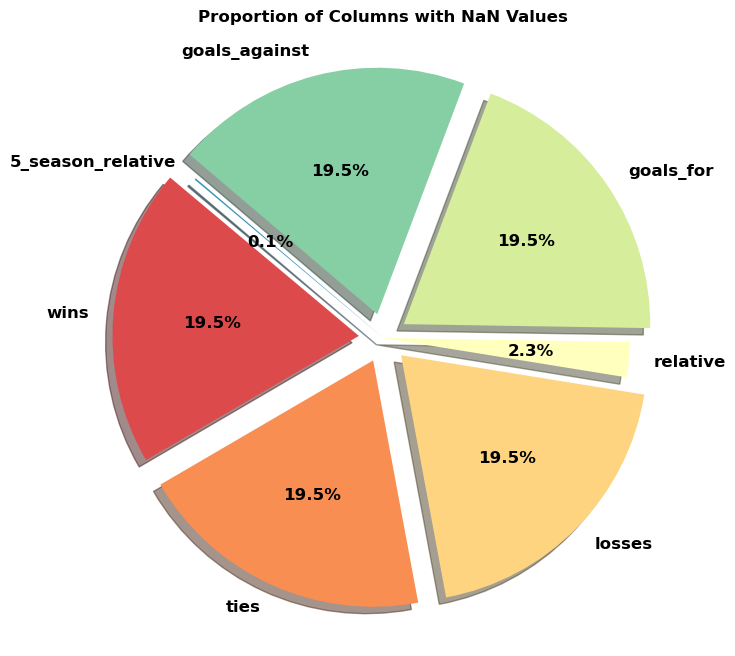

In [9]:
# Use a visually pleasing color palette from seaborn
colors = sns.color_palette("Spectral", len(columns_with_nan))

# Pie chart for columns with NaN values
fig, ax = plt.subplots(figsize=(10, 8))

# Pie chart displaying the proportion of NaN values with shadow
ax.pie(columns_with_nan, labels=[f'{label}' for label in columns_with_nan.index], 
       autopct=lambda p: f'{p:.1f}%', colors=colors, startangle=140, 
       explode=[0.1 if value == max(columns_with_nan.values) else 0 for value in columns_with_nan.values],
       textprops={'fontweight': 'bold', 'fontsize': 12}, shadow=True)
ax.set_title('Proportion of Columns with NaN Values', fontweight='bold')

# Show the third plot
plt.show()

### c. Summary

+ **Numeric Columns :** The dataset has **2828** missing values across the numerical columns, which account for **100.00 %** of all possible values in the dataset. These critical performance metrics are frequently missing and need attention during data cleaning.
  
    + Columns of Type **`float64`** : All missing values are found within the columns of type `float64`.
      
        + The most significant contributors to missing values are the columns **`wins`**, **`ties`**, **`losses`**, **`goals_for`**, and **`goals_against`**, each having **552** missing values, equivalent to **12.71 %** of the data for those columns.
        + The **`relative`** column has **65** missing values (**1.50 %**).
        + The **`5_season_relative`** column has **3** missing values (**0.07 %**).
        + Other columns like **`revenue`**, **`spent`**, **`league_spent`**, **`net`**, **`5_season_agg`**, **`5_season_net`**, and **`5_season_league_agg`** have no missing values.

+ **Categorical Columns:** (**`league`**, **`team`**, **`competition`**, and **`position`**) do not have any missing values

***NOTES :*** 


+ The dataset has a **substantial** amount of **missing data** concentrated in the **`wins`**, **`ties`**, **`losses`**, **`goals_for`**, and **`goals_against`** columns.
+ The **categorical** columns **do not have any missing values**, suggesting that qualitative data is intact and can be used reliably for grouping or comparative analysis.

## 4. Summary

+ **Shape/Size** : The dataset contains **4342 rows** and **20 columns**, with a total of **86,840 data points**.
+ **Missing Values**: **2828** missing values (**3.26%**) were **found**, primarily in **numeric** columns (**4.07% missing**). **Categorical** columns had **no missing values**.
+ **Duplicates**: **No duplicate** rows were identified in the dataset.
+ **Datatypes :**
  + The dataset has **16** **numeric** columns and **4** **categorical** columns.
    + **Numeric** columns include both **float64** and **int64** types, covering key metrics like **`revenue`**, **`spent`**, **`wins`**, etc.
    + **Categorical** columns, such as **`league`**, **`team`**, **`ompetitio`**, and **`position`**, were identified and handled accordingly.

## Conclusion 

The initial **data understanding** phase has provided a **clear overview** of the dataset's structure and quality. We have **identified** and quantified the **missing values**, ensuring there are **no duplicates** that could **skew** the analysis. The distinction between **numerical** and **categorical** data types has been **established**, which will guide our preprocessing strategies. Moving forward, the next phase will involve **data cleaning and preprocessing** where we will address the **missing values** in the **numerical** columns and ensure all **categorical** data is appropriately **encoded**. This will prepare our dataset for more detailed exploratory data analysis.